Resultados guardados en: /Volumes/16GB/laura_mesa/Gene_inversion/220225/dn_ds_220225/dn_ds_results.xlsx


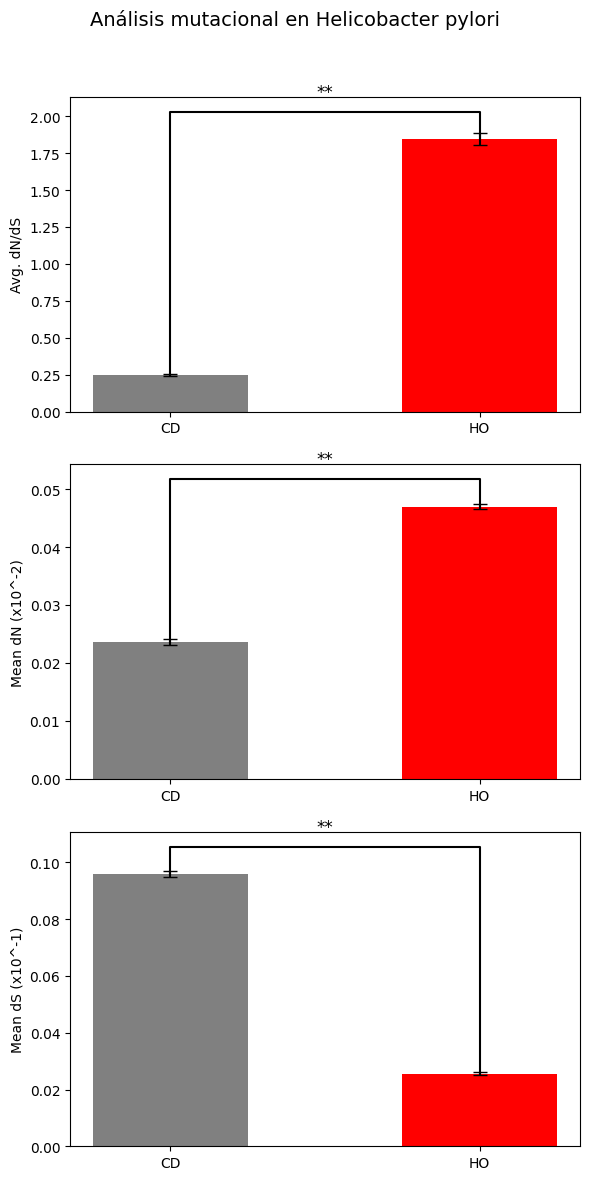

Gráficos generados y guardados en: /Volumes/16GB/laura_mesa/Gene_inversion/220225/dn_ds_220225/dn_ds_analysis.png


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

file_path = '/Volumes/16GB/laura_mesa/Gene_inversion/220225/dn_ds_220225/dn_ds_1155.xlsx'
df = pd.read_excel(file_path)


dS_CD = df.iloc[:, 1]
dS_CD_std = df.iloc[:, 2]
dN_CD = df.iloc[:, 3]
dN_CD_std = df.iloc[:, 4]
dS_HO = df.iloc[:, 5]
dS_HO_std = df.iloc[:, 6]
dN_HO = df.iloc[:, 7]
dN_HO_std = df.iloc[:, 8]


dS_CD_mean = np.mean(dS_CD)
dS_CD_se = np.std(dS_CD, ddof=1) / np.sqrt(len(dS_CD))
dN_CD_mean = np.mean(dN_CD)
dN_CD_se = np.std(dN_CD, ddof=1) / np.sqrt(len(dN_CD))
dS_HO_mean = np.mean(dS_HO)
dS_HO_se = np.std(dS_HO, ddof=1) / np.sqrt(len(dS_HO))
dN_HO_mean = np.mean(dN_HO)
dN_HO_se = np.std(dN_HO, ddof=1) / np.sqrt(len(dN_HO))

dN_dS_CD_mean = dN_CD_mean / dS_CD_mean
dN_dS_CD_se = dN_dS_CD_mean * np.sqrt((dN_CD_se / dN_CD_mean) ** 2 + (dS_CD_se / dS_CD_mean) ** 2)
dN_dS_HO_mean = dN_HO_mean / dS_HO_mean
dN_dS_HO_se = dN_dS_HO_mean * np.sqrt((dN_HO_se / dN_HO_mean) ** 2 + (dS_HO_se / dS_HO_mean) ** 2)

#  Z-test
def compute_p_value(mean1, se1, mean2, se2):
    se = np.sqrt(se1**2 + se2**2)
    z_score = (mean1 - mean2) / se
    p_value = 2 * (1 - norm.cdf(np.abs(z_score)))
    return p_value

dN_dS_p = compute_p_value(dN_dS_CD_mean, dN_dS_CD_se, dN_dS_HO_mean, dN_dS_HO_se)
dN_p = compute_p_value(dN_CD_mean, dN_CD_se, dN_HO_mean, dN_HO_se)
dS_p = compute_p_value(dS_CD_mean, dS_CD_se, dS_HO_mean, dS_HO_se)


results_df = pd.DataFrame({
    'Métrica': ['dN/dS', 'dN', 'dS'],
    'Media CD': [dN_dS_CD_mean, dN_CD_mean, dS_CD_mean],
    'Error estándar CD': [dN_dS_CD_se, dN_CD_se, dS_CD_se],
    'Media HO': [dN_dS_HO_mean, dN_HO_mean, dS_HO_mean],
    'Error estándar HO': [dN_dS_HO_se, dN_HO_se, dS_HO_se],
    'p-valor': [dN_dS_p, dN_p, dS_p]
})

excel_output_path = '/Volumes/16GB/laura_mesa/Gene_inversion/220225/dn_ds_220225/dn_ds_results.xlsx'
results_df.to_excel(excel_output_path, index=False)
print(f'Resultados guardados en: {excel_output_path}')

# Graphic configuration 
fig, axes = plt.subplots(3, 1, figsize=(6, 12))
bar_width = 0.5
indices = np.array([0, 1])
labels = ['CD', 'HO']
colors = ['gray', 'red']

def add_significance(ax, y1, y2, p_value):
    max_y = max(y1, y2) * 1.1
    ax.plot([0, 0, 1, 1], [y1, max_y, max_y, y2], lw=1.5, color='black')
    if p_value < 0.01:
        ax.text(0.5, max_y * 1.05, '**', ha='center', fontsize=12, color='black')
    elif p_value < 0.05:
        ax.text(0.5, max_y * 1.05, '*', ha='center', fontsize=12, color='black')

# Graphic de dN/dS
axes[0].bar(indices, [dN_dS_CD_mean, dN_dS_HO_mean], bar_width, yerr=[dN_dS_CD_se, dN_dS_HO_se], capsize=5, color=colors)
add_significance(axes[0], dN_dS_CD_mean, dN_dS_HO_mean, dN_dS_p)
axes[0].set_ylabel('Avg. dN/dS')
axes[0].set_xticks(indices)
axes[0].set_xticklabels(labels)

# Graphic de dN
axes[1].bar(indices, [dN_CD_mean, dN_HO_mean], bar_width, yerr=[dN_CD_se, dN_HO_se], capsize=5, color=colors)
add_significance(axes[1], dN_CD_mean, dN_HO_mean, dN_p)
axes[1].set_ylabel('Mean dN (x10^-2)')
axes[1].set_xticks(indices)
axes[1].set_xticklabels(labels)

# Graphic dS
axes[2].bar(indices, [dS_CD_mean, dS_HO_mean], bar_width, yerr=[dS_CD_se, dS_HO_se], capsize=5, color=colors)
add_significance(axes[2], dS_CD_mean, dS_HO_mean, dS_p)
axes[2].set_ylabel('Mean dS (x10^-1)')
axes[2].set_xticks(indices)
axes[2].set_xticklabels(labels)

title = 'Análisis mutacional en Helicobacter pylori'
fig.suptitle(title, fontsize=14)
fig.tight_layout(rect=[0, 0, 1, 0.96])

# save Graphic
output_path = '/Volumes/16GB/laura_mesa/Gene_inversion/220225/dn_ds_220225/dn_ds_analysis.png'
plt.savefig(output_path, dpi=300, bbox_inches='tight')
plt.show()

print(f'Gráficos generados y guardados en: {output_path}')


In [ ]:
import pandas as pd
import numpy as np

# Cargar los datos desde el archivo Excel
file_path = '/Volumes/16GB/laura_mesa/Gene_inversion/220225/dn_ds_220225/dn_ds_1155_dnds_ps2.xlsx'
df = pd.read_excel(file_path)

# Extraer los valores usando loc
dN_dS_CD = df.loc[:, 'dN/dS CD']
dN_dS_HO = df.loc[:, 'dN/dS HO']

# Calcular promedio y desviación estándar
dN_dS_CD_mean = dN_dS_CD.mean()
dN_dS_CD_std = dN_dS_CD.std()
dN_dS_HO_mean = dN_dS_HO.mean()
dN_dS_HO_std = dN_dS_HO.std()

# Calcular el porcentaje de valores dN/dS > 1
percent_CD = (dN_dS_CD > 1).mean() * 100
percent_HO = (dN_dS_HO > 1).mean() * 100

# Crear un DataFrame con los resultados
results = pd.DataFrame({
    'Group': ['CD', 'HO'],
    'Mean dN/dS': [dN_dS_CD_mean, dN_dS_HO_mean],
    'Std dN/dS': [dN_dS_CD_std, dN_dS_HO_std],
    '% dN/dS > 1': [percent_CD, percent_HO]
})

# Guardar los resultados en un archivo Excel
output_path = '/Volumes/16GB/laura_mesa/Gene_inversion/220225/dn_ds_220225/dnds_summary.xlsx'
results.to_excel(output_path, index=False)

print(f'Resultados guardados en: {output_path}')


Resultados guardados en: /Volumes/16GB/laura_mesa/Gene_inversion/220225/dn_ds_220225/dnds_summary.xlsx


In [ ]:
import pandas as pd
import numpy as np

# Cargar los datos desde el archivo Excel
file_path = '/Volumes/16GB/laura_mesa/Gene_inversion/220225/dn_ds_220225/dn_ds_1155_dnds_ps2.xlsx'
df = pd.read_excel(file_path)

# Extraer los valores usando loc
prob_CD = df.loc[:, 'Prob CD']
prob_HO = df.loc[:, 'Prob HO']

# Calcular promedio y desviación estándar
prob_CD_mean = prob_CD.mean()
prob_CD_std = prob_CD.std()
prob_HO_mean = prob_HO.mean()
prob_HO_std = prob_HO.std()

# Calcular el porcentaje de selección positiva (Prob < 0.05)
percent_CD = (prob_CD < 0.05).mean() * 100
percent_HO = (prob_HO < 0.05).mean() * 100

# Crear un DataFrame con los resultados
results = pd.DataFrame({
    'Group': ['CD', 'HO'],
    'Mean Prob': [prob_CD_mean, prob_HO_mean],
    '% Std_Prob < 0,05': [prob_CD_std, prob_HO_std],
    '% Z_Test (Prob < 0.05)': [percent_CD, percent_HO]
})

# Guardar los resultados en un archivo Excel
output_path = '/Volumes/16GB/laura_mesa/Gene_inversion/220225/dn_ds_220225/Prob_summary2.xlsx'
results.to_excel(output_path, index=False)

print(f'Resultados guardados en: {output_path}')


Resultados guardados en: /Volumes/16GB/laura_mesa/Gene_inversion/220225/dn_ds_220225/Prob_summary2.xlsx


In [ ]:
import pandas as pd

# 1) Cargar el primer Excel: datos del genoma completo en 1331 cepas
#    Columnas esperadas: ["Genoma", "CD frequencies", "HO frequencies"]
df_all = pd.read_excel("/Volumes/16GB/laura_mesa/Gene_inversion/220225/mochi_220225/Summary_Results_MochiStatisticV1F.xlsx")

# 2) Cargar el segundo Excel: datos del genoma central (1155 genes)
#    Columnas esperadas: ["Gene", "CD genes", "HO genes"]
df_core = pd.read_excel("/Volumes/16GB/laura_mesa/Gene_inversion/220225/mochi_220225/1331_count_CDHO_final.xlsx")

# --- Cálculo para "All Genes" (genoma completo) ---

# Suma total de genes HO y CD en las 1331 cepas
total_HO = df_all["HO frequencies"].sum()
total_CD = df_all["CD frequencies"].sum()

# Porcentaje de HO en el genoma completo
all_genes_total = total_HO + total_CD
all_genes_ho_fraction = total_HO / all_genes_total

# --- Cálculo para "Core Genes" ---

# Suma total de apariciones HO y CD en los 1155 genes del core
core_HO = df_core["HO genes"].sum()
core_CD = df_core["CD genes"].sum()

# Porcentaje de HO en el core
core_total = core_HO + core_CD
core_ho_fraction = core_HO / core_total

# --- Ratio (core vs. all) ---
ratio = core_ho_fraction / all_genes_ho_fraction

# --- Imprimir resultados ---
print("Resultados para Helicobacter pylori:")
print(f" - %% HO en el genoma completo: {all_genes_ho_fraction:.2%}")
print(f" - %% HO en el genoma central:  {core_ho_fraction:.2%}")
print(f" - Ratio (Core / All):         {ratio:.2f}")

# Si quisieras una 'mini-tabla' en pantalla:
print("\nTabla resumida:")
print("------------------------------------------------------")
print("         % HO (All Genes)   % HO (Core)   Ratio")
print(f"H.pylori       {all_genes_ho_fraction:.2%}          {core_ho_fraction:.2%}      {ratio:.2f}")


Resultados para Helicobacter pylori:
 - %% HO en el genoma completo: 51.21%
 - %% HO en el genoma central:  50.64%
 - Ratio (Core / All):         0.99

Tabla resumida:
------------------------------------------------------
         % HO (All Genes)   % HO (Core)   Ratio
H.pylori       51.21%          50.64%      0.99


Script finalizado.
La tabla de resultados se guardó en: /Volumes/16GB/laura_mesa/Gene_inversion/220225/dn_ds_220225/Tabla1_Result.xlsx
La figura se guardó en: /Volumes/16GB/laura_mesa/Gene_inversion/220225/dn_ds_220225/Table1_plot.png
p-value (Chi-cuadrado): 0.0


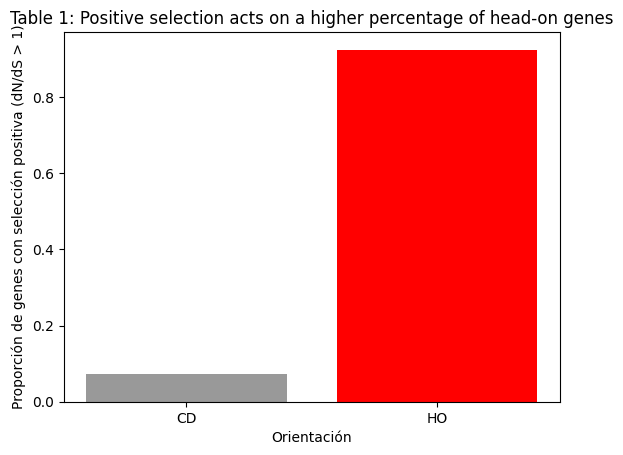

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# CORE FULL
# 1. Leer el archivo Excel
input_file = "/Volumes/16GB/laura_mesa/Gene_inversion/220225/dn_ds_220225/dn_ds_1155_dnds_ps2.xlsx"
df = pd.read_excel(input_file, sheet_name="Hoja1")

# 2. Renombrar las columnas para evitar espacios y caracteres especiales
df = df.rename(columns={"dN/dS CD": "dN_dS_CD", "dN/dS HO": "dN_dS_HO"})

# 3. Contar los genes con dN/dS > 1 (selección positiva) y <= 1 en cada orientación
pos_sel_CD = (df["dN_dS_CD"] > 1).sum()   # Genes con dN/dS > 1 en CD
no_sel_CD  = (df["dN_dS_CD"] <= 1).sum()    # Genes con dN/dS <= 1 en CD

pos_sel_HO = (df["dN_dS_HO"] > 1).sum()      # Genes con dN/dS > 1 en HO
no_sel_HO  = (df["dN_dS_HO"] <= 1).sum()       # Genes con dN/dS <= 1 en HO

# 4. Construir la tabla de contingencia y aplicar la prueba Chi-cuadrado
contingency = np.array([
    [pos_sel_CD, no_sel_CD],
    [pos_sel_HO, no_sel_HO]
])
chi2, p_value, dof, expected = chi2_contingency(contingency)

# 5. Crear la tabla final con los nombres de columna ajustados
total_CD = pos_sel_CD + no_sel_CD
total_HO = pos_sel_HO + no_sel_HO

data = {
    "Orientacion": ["CD", "HO"],
    "Genes_Totales": [total_CD, total_HO],
    "Genes dN/dS > 1": [pos_sel_CD, pos_sel_HO],
    "Percentaje": [pos_sel_CD/total_CD, pos_sel_HO/total_HO],
    "Genes_No_Sel": [no_sel_CD, no_sel_HO],
    "chi-sq p-value": [p_value, p_value]  # Se asigna el mismo p-value a ambas filas como referencia
}

tabla_final = pd.DataFrame(data)


# 6. Guardar la tabla final en un archivo Excel
output_excel = "/Volumes/16GB/laura_mesa/Gene_inversion/220225/dn_ds_220225/Tabla1_Result.xlsx"
tabla_final.to_excel(output_excel, sheet_name="Resultados", index=False)

# 7. Generar la figura de barras con fondo transparente
fig, ax = plt.subplots()

# Especificar colores personalizados: "0.6" es un gris (60% de intensidad) y "red" es rojo
colors = ["0.6", "red"]

# Crear el gráfico de barras usando la columna "Percentaje"
ax.bar(tabla_final["Orientacion"], tabla_final["Percentaje"], color=colors)

ax.set_title("Table 1: Positive selection acts on a higher percentage of head-on genes")
ax.set_xlabel("Orientación")
ax.set_ylabel("Proporción de genes con selección positiva (dN/dS > 1)")
ax.grid(False)

# Configurar fondo transparente para la figura y el área de trazado
fig.patch.set_alpha(0)   # Fondo de la figura
ax.patch.set_alpha(0)    # Fondo del área del plot

# Guardar la figura con fondo transparente
output_plot = "/Volumes/16GB/laura_mesa/Gene_inversion/220225/dn_ds_220225/Table1_plot.png"
plt.savefig(output_plot, transparent=True, dpi=300, bbox_inches='tight')

# Mensaje final
print("Script finalizado.")
print("La tabla de resultados se guardó en:", output_excel)
print("La figura se guardó en:", output_plot)
print("p-value (Chi-cuadrado):", p_value)



Script finalizado.
La tabla de resultados se guardó en: /Volumes/16GB/laura_mesa/Gene_inversion/220225/dn_ds_220225/Tabla_Result_VPI.xlsx
La figura se guardó en: /Volumes/16GB/laura_mesa/Gene_inversion/220225/dn_ds_220225/Table_plot_VPI.png
p-value (Chi-cuadrado): 1.1845046709038967e-26


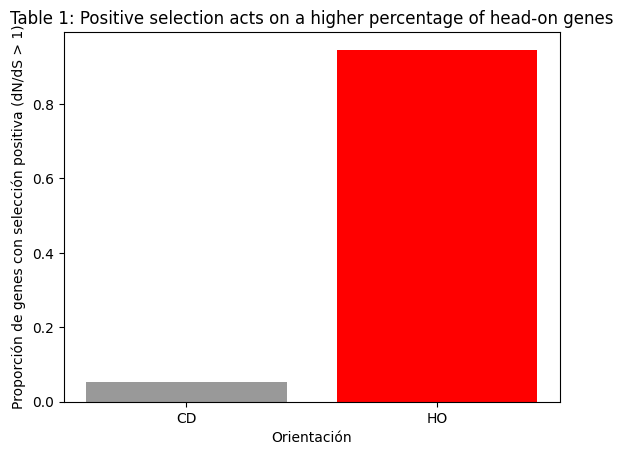

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# CORE IVP
# 1. Leer el archivo Excel
input_file = "/Volumes/16GB/laura_mesa/Gene_inversion/220225/dn_ds_220225/filtered_data_VPI.xlsx"
df = pd.read_excel(input_file, sheet_name="Sheet1")

# 2. Renombrar las columnas para evitar espacios y caracteres especiales
df = df.rename(columns={"dN/dS CD": "dN_dS_CD", "dN/dS HO": "dN_dS_HO"})

# 3. Contar los genes con dN/dS > 1 (selección positiva) y <= 1 en cada orientación
pos_sel_CD = (df["dN_dS_CD"] > 1).sum()   # Genes con dN/dS > 1 en CD
no_sel_CD  = (df["dN_dS_CD"] <= 1).sum()    # Genes con dN/dS <= 1 en CD

pos_sel_HO = (df["dN_dS_HO"] > 1).sum()      # Genes con dN/dS > 1 en HO
no_sel_HO  = (df["dN_dS_HO"] <= 1).sum()       # Genes con dN/dS <= 1 en HO

# 4. Construir la tabla de contingencia y aplicar la prueba Chi-cuadrado
contingency = np.array([
    [pos_sel_CD, no_sel_CD],
    [pos_sel_HO, no_sel_HO]
])
chi2, p_value, dof, expected = chi2_contingency(contingency)

# 5. Crear la tabla final con los nombres de columna ajustados
total_CD = pos_sel_CD + no_sel_CD
total_HO = pos_sel_HO + no_sel_HO

data = {
    "Orientacion": ["CD", "HO"],
    "Genes_Totales": [total_CD, total_HO],
    "Genes dN/dS > 1": [pos_sel_CD, pos_sel_HO],
    "Percentaje": [pos_sel_CD/total_CD, pos_sel_HO/total_HO],
    "Genes_No_Sel": [no_sel_CD, no_sel_HO],
    "chi-sq p-value": [p_value, p_value]  # Se asigna el mismo p-value a ambas filas como referencia
}

tabla_final = pd.DataFrame(data)


# 6. Guardar la tabla final en un archivo Excel
output_excel = "/Volumes/16GB/laura_mesa/Gene_inversion/220225/dn_ds_220225/Tabla_Result_VPI.xlsx"
tabla_final.to_excel(output_excel, sheet_name="Resultados", index=False)

# 7. Generar la figura de barras con fondo transparente
fig, ax = plt.subplots()

# Especificar colores personalizados: "0.6" es un gris (60% de intensidad) y "red" es rojo
colors = ["0.6", "red"]

# Crear el gráfico de barras usando la columna "Percentaje"
ax.bar(tabla_final["Orientacion"], tabla_final["Percentaje"], color=colors)

ax.set_title("Table 1: Positive selection acts on a higher percentage of head-on genes")
ax.set_xlabel("Orientación")
ax.set_ylabel("Proporción de genes con selección positiva (dN/dS > 1)")
ax.grid(False)

# Configurar fondo transparente para la figura y el área de trazado
fig.patch.set_alpha(0)   # Fondo de la figura
ax.patch.set_alpha(0)    # Fondo del área del plot

# Guardar la figura con fondo transparente
output_plot = "/Volumes/16GB/laura_mesa/Gene_inversion/220225/dn_ds_220225/Table_plot_VPI.png"
plt.savefig(output_plot, transparent=True, dpi=300, bbox_inches='tight')

# Mensaje final
print("Script finalizado.")
print("La tabla de resultados se guardó en:", output_excel)
print("La figura se guardó en:", output_plot)
print("p-value (Chi-cuadrado):", p_value)

